In [1]:
#for warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import r2_score


In [3]:
#read data from cvs file
df= pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Check for Null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Check for Duplicate 

In [9]:
# copy to dummy data frame
df_dummy = df

In [10]:
#Drop duplicate entires 
df_dummy.drop_duplicates(subset=None, inplace=True)


In [11]:
df_dummy.shape

(730, 16)

Shape of dummy data frame and orignal dataframe is same, hence there is no duplicate entires in dataframe.


## Dropping unwanted column

In [12]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [13]:
df.drop(['instant','dteday','casual', 'registered'],axis=1,inplace=True)

In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Mapping the Season column

In [15]:
df.season =df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='season', ylabel='cnt'>

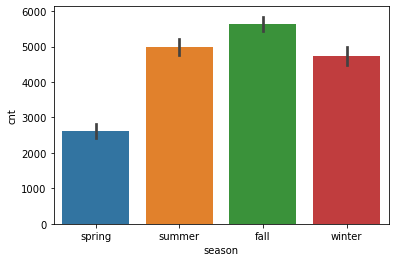

In [17]:
sns.barplot('season','cnt',data=df)

Fall season having more booking

In [18]:
df.yr =df.yr.map({0:'2018',1:'2019'})

In [19]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [20]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 90.3+ KB


In [22]:
df["year"] = df["year"].astype("int64")

<AxesSubplot:xlabel='year', ylabel='count'>

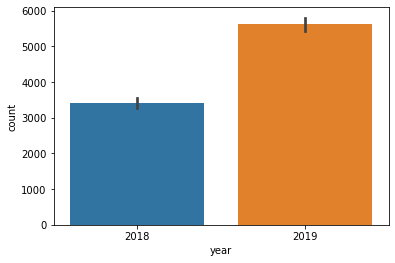

In [23]:
sns.barplot(x='year',y='count',data=df)

2019 have more business then than 2018

In [24]:
df.weekday =df.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

In [25]:
df.month =df.month.map({1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'})

In [26]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='month', ylabel='count'>

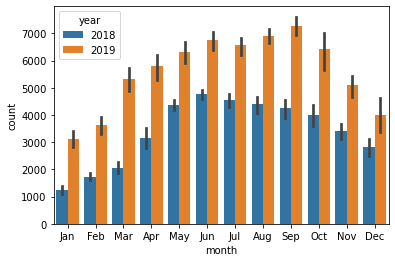

In [27]:

sns.barplot(x='month',y='count',data=df,hue='year')

Sep 2019 have more business

<AxesSubplot:xlabel='season', ylabel='count'>

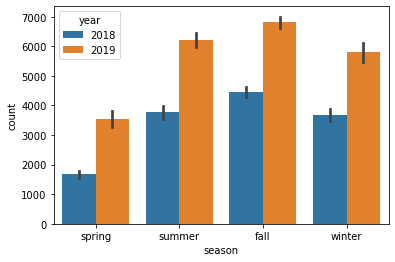

In [28]:
sns.barplot(x='season',y='count',data=df,hue='year')

Fall season seems higher in 2019. 2019 have more booking then 2018.

In [29]:
df.weathersit =df.weathersit.map({   1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'})

<AxesSubplot:xlabel='weathersit', ylabel='count'>

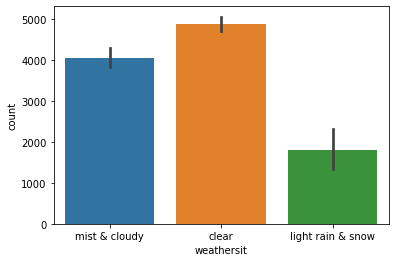

In [30]:
sns.barplot(x='weathersit',y='count',data=df)

in Clear wheather Bikes are more booked

<AxesSubplot:xlabel='weathersit', ylabel='count'>

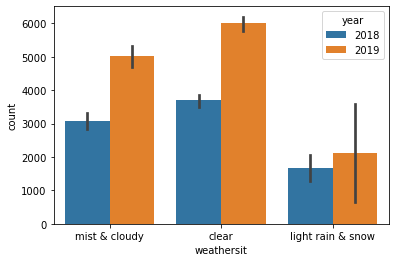

In [31]:
sns.barplot(x='weathersit',y='count',data=df,hue='year')

clear wheather have more bike booking in 2019.  2019 have more booking then 2018.


<AxesSubplot:xlabel='weekday', ylabel='count'>

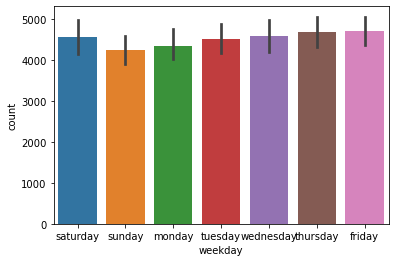

In [32]:
sns.barplot(x='weekday',y='count',data=df)

friday and saturday have more bikes booked

<AxesSubplot:xlabel='workingday', ylabel='count'>

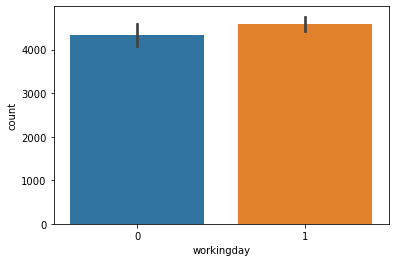

In [33]:
sns.barplot(x='workingday',y='count',data=df)

bikes are more booked on working day

<AxesSubplot:xlabel='workingday', ylabel='count'>

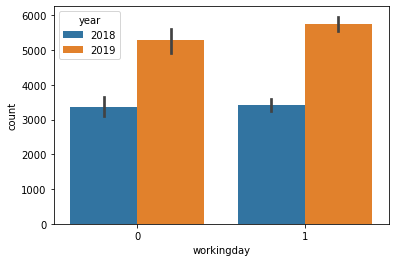

In [34]:
sns.barplot(x='workingday',y='count',data=df,hue='year')

2019 seems more booking then 2018

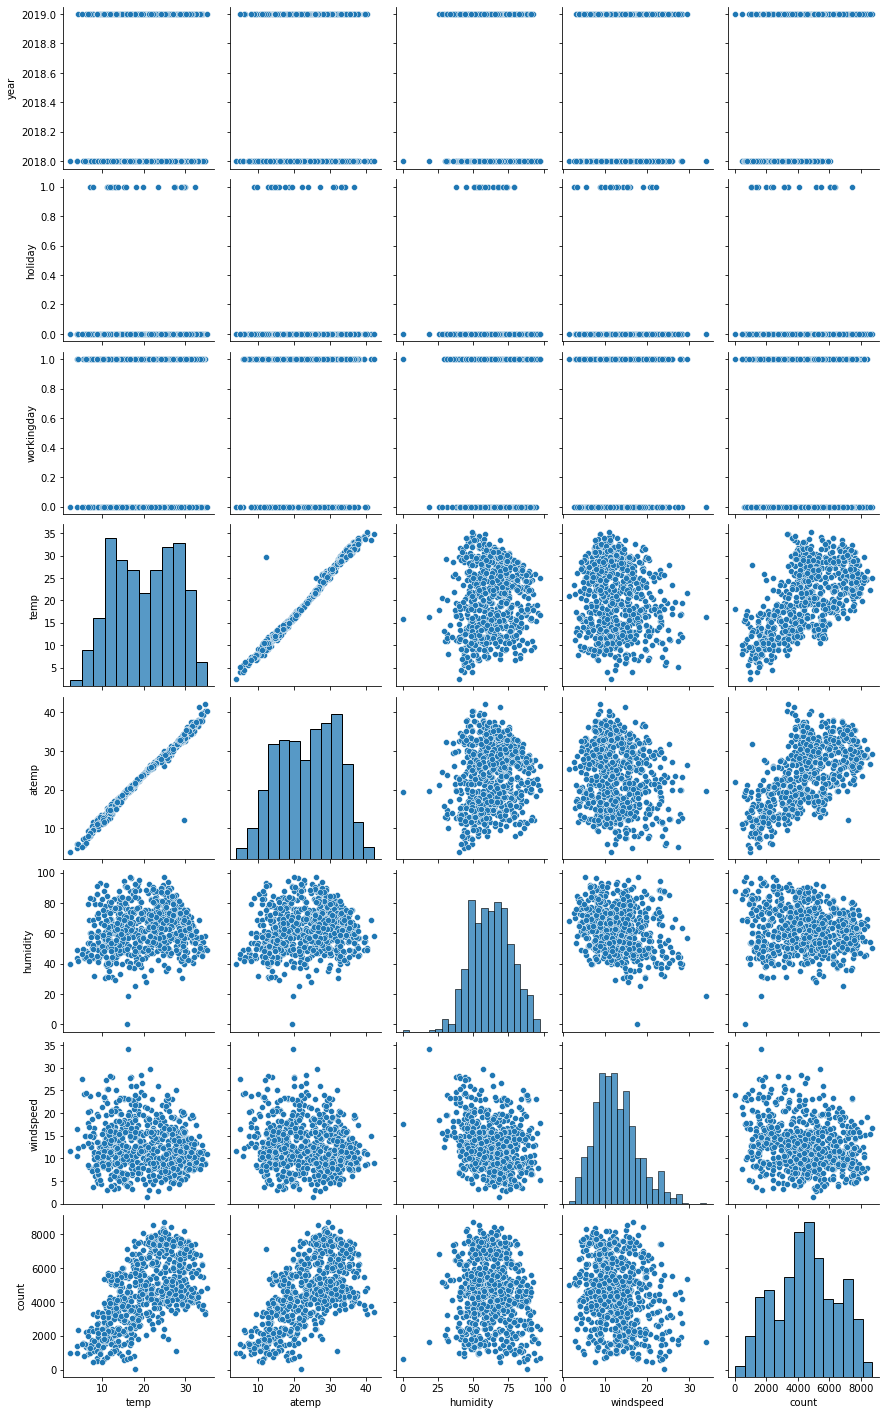

In [35]:
sns.pairplot(data=df,x_vars=['temp','atemp','humidity','windspeed','count'])


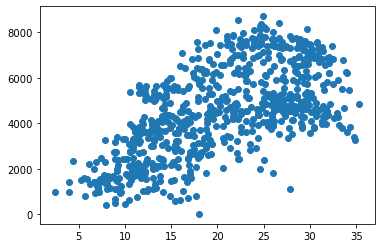

In [36]:
plt.scatter('temp','count',data=df)

bike booking is higher as temp increases.

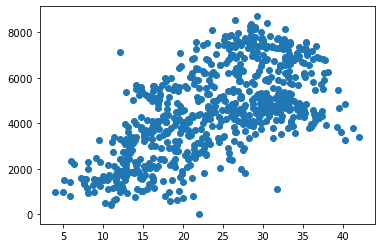

In [37]:
plt.scatter('atemp','count',data=df)

bike booking is higher when feel temp is higher.

<AxesSubplot:>

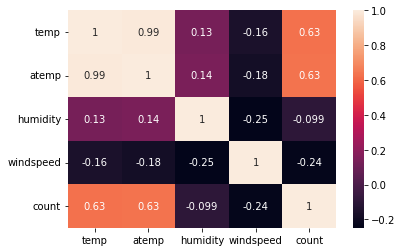

In [38]:
sns.heatmap(df[['temp','atemp','humidity','windspeed','count']].corr(),annot=True)

temp and atemp are high are correlated to each other, so we can drop one of them.

In [39]:
#drop atemp
df=df.drop('atemp',axis=1)

In [40]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,0,saturday,0,mist & cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,sunday,0,mist & cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


##  Data Preparation

In [41]:
seasons = pd.get_dummies(df['season'], drop_first=True)



weather= pd.get_dummies(df['weathersit'],drop_first=True)

months= pd.get_dummies(df['month'],drop_first=True)

week_days= pd.get_dummies(df['weekday'],drop_first=True)

In [42]:
#add variable to data frame
df = pd.concat([df,seasons,weather,months,week_days], axis = 1 )

In [43]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,spring,2018,Jan,0,saturday,0,mist & cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,2018,Jan,0,sunday,0,mist & cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,2018,Jan,0,monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,2018,Jan,0,tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,2018,Jan,0,wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [44]:
df.shape

(730, 33)

In [45]:
#drop categorical var.
df.drop(['season','weathersit','weekday','month'], axis=1 , inplace =True)

In [46]:
df.shape

(730, 29)

In [47]:
df.head()


,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,2018,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   humidity           730 non-null    float64
 5   windspeed          730 non-null    float64
 6   count              730 non-null    int64  
 7   spring             730 non-null    uint8  
 8   summer             730 non-null    uint8  
 9   winter             730 non-null    uint8  
 10  light rain & snow  730 non-null    uint8  
 11  mist & cloudy      730 non-null    uint8  
 12  Aug                730 non-null    uint8  
 13  Dec                730 non-null    uint8  
 14  Feb                730 non-null    uint8  
 15  Jan                730 non-null    uint8  
 16  Jul                730 non

## Spliting of data into train and test


In [49]:
#split of data frame into train and test
np.random.seed(0)

In [50]:
df_train, df_test = train_test_split(df,train_size=0.7,random_state=100)

In [51]:
df_train.shape

(510, 29)

In [52]:
df_test.shape

(220, 29)

In [53]:
## Rescale the feature.

In [54]:
scaler = MinMaxScaler()

In [55]:
#apply scaling to columns
var_num =['temp','windspeed','humidity','count']
df_train[var_num]=scaler.fit_transform(df_train[var_num])

In [56]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
576,2019,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,2019,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,2019,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,2019,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0
111,2018,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               510 non-null    int64  
 1   holiday            510 non-null    int64  
 2   workingday         510 non-null    int64  
 3   temp               510 non-null    float64
 4   humidity           510 non-null    float64
 5   windspeed          510 non-null    float64
 6   count              510 non-null    float64
 7   spring             510 non-null    uint8  
 8   summer             510 non-null    uint8  
 9   winter             510 non-null    uint8  
 10  light rain & snow  510 non-null    uint8  
 11  mist & cloudy      510 non-null    uint8  
 12  Aug                510 non-null    uint8  
 13  Dec                510 non-null    uint8  
 14  Feb                510 non-null    uint8  
 15  Jan                510 non-null    uint8  
 16  Jul                510 n

In [59]:
# x and y model
y_train = df_train.pop('count')
x_train = df_train


In [60]:
lm = LinearRegression()
lm.fit(x_train , y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)

In [61]:
list(zip(x_train,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light rain & snow', True, 1),
 ('mist & cloudy', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 7),
 ('thursday', False, 10),
 ('tuesday', False, 9),
 ('wednesday', False, 11)]

In [62]:
#RFE column
cols=x_train.columns[rfe.support_]
print(cols)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'light rain & snow', 'mist & cloudy',
       'Jan', 'Jul', 'Sep', 'saturday'],
      dtype='object')


In [63]:

x_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'monday',
       'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [64]:
#new dataframe with RFE variables
x_train_rfe = x_train[cols]

In [65]:
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               510 non-null    int64  
 1   holiday            510 non-null    int64  
 2   workingday         510 non-null    int64  
 3   temp               510 non-null    float64
 4   humidity           510 non-null    float64
 5   windspeed          510 non-null    float64
 6   spring             510 non-null    uint8  
 7   summer             510 non-null    uint8  
 8   winter             510 non-null    uint8  
 9   light rain & snow  510 non-null    uint8  
 10  mist & cloudy      510 non-null    uint8  
 11  Jan                510 non-null    uint8  
 12  Jul                510 non-null    uint8  
 13  Sep                510 non-null    uint8  
 14  saturday           510 non-null    uint8  
dtypes: float64(3), int64(3), uint8(9)
memory usage: 32.4 KB


In [66]:
x_train_rfe=sm.add_constant(x_train_rfe)

In [67]:
# linear model
lm= sm.OLS(y_train,x_train_rfe).fit()

In [68]:
#display the MODEL 1
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.22e-191
Time:                        18:21:19   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -464.9517     16.159    -28.773      0.000    -496.701    -433.203
year                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday              -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday            0.0433      0.012      3.762      0.000       0.021       0.066
temp                  0.5096      0.034     14.837      0.000       0.442       0.577
humidity             -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed            -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring               -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer                0.0508      0.015      3.423      0.001       0.022       0.080
winter                0.0933      0.017      5.403      0.000       0.059       0.127
light rain & snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
mist & cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Jan                  -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul                  -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                   0.0814      0.016      4.945      0.000       0.049       0.114
saturday              0.0536      0.014      3.694      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                     8.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Generic function to calculate VIF of variables

def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

# CALCULATE VIF FOR MODEL 1

In [70]:
#calculate VIF (Variable Inflation Factor) for MODEL 1
 

calculate_VIF(x_train_rfe)
 

,Features,VIF
0,const,16906513.40
7,spring,5.08
4,temp,3.89
9,winter,3.59
8,summer,2.65
5,humidity,1.91
3,workingday,1.88
15,saturday,1.78
11,mist & cloudy,1.57
12,Jan,1.57


## VIF value of CONST is very high, so we will drop it.

In [71]:
x_train_new = x_train_rfe.drop(['const'], axis =1)

In [72]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

##  MODEL 2

In [73]:
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
 

In [74]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.22e-191
Time:                        18:21:35   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -464.9517     16.159    -28.773      0.000    -496.701    -433.203
year                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday              -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday            0.0433      0.012      3.762      0.000       0.021       0.066
temp                  0.5096      0.034     14.837      0.000       0.442       0.577
humidity             -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed            -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring               -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer                0.0508      0.015      3.423      0.001       0.022       0.080
winter                0.0933      0.017      5.403      0.000       0.059       0.127
light rain & snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
mist & cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Jan                  -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul                  -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                   0.0814      0.016      4.945      0.000       0.049       0.114
saturday              0.0536      0.014      3.694      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                     8.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# CHECK VIF AGAIN MODEL 2

In [75]:
#calculate vif MODEL 2

calculate_VIF(x_train_new)


,Features,VIF
0,year,83.85
4,humidity,39.51
3,temp,25.43
6,spring,6.70
2,workingday,5.81
5,windspeed,5.54
8,winter,4.75
7,summer,3.51
10,mist & cloudy,2.39
14,saturday,2.11


## p value shows Jan value is high, do we will drop it


In [76]:
x_train_new = x_train_new.drop(['Jan'], axis =1)

In [77]:
# again rebuild the model

In [78]:
x_train_lm = sm.add_constant(x_train_new)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.11e-191
Time:                        18:22:08   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -463.4223     16.189    -28.626      0.000    -495.230    -431.615
year                  0.2298      0.008     28.647      0.000       0.214       0.246
holiday              -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday            0.0430      0.012      3.725      0.000       0.020       0.066
temp                  0.5277      0.033     15.884      0.000       0.462       0.593
humidity             -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed            -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring               -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer                0.0537      0.015      3.631      0.000       0.025       0.083
winter                0.0992      0.017      5.815      0.000       0.066       0.133
light rain & snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
mist & cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
Jul                  -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep                   0.0820      0.017      4.966      0.000       0.050       0.114
saturday              0.0530      0.015      3.648      0.000       0.024       0.082
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     8.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## check vif again


In [79]:
#calculate vif

calculate_VIF(x_train_new)
 

,Features,VIF
0,year,81.47
4,humidity,39.37
3,temp,23.70
6,spring,6.61
2,workingday,5.81
5,windspeed,5.47
8,winter,4.61
7,summer,3.48
10,mist & cloudy,2.39
13,saturday,2.11


## PVALUE   shows high of holiday , do we will drop it

In [80]:
# Dropping the working day variable
x_train_new = x_train_new.drop(["holiday"], axis = 1)

In [81]:
x_train_lm = sm.add_constant(x_train_new)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.54e-191
Time:                        18:22:31   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -463.8786     16.250    -28.547      0.000    -495.805    -431.952
year                  0.2300      0.008     28.568      0.000       0.214       0.246
workingday            0.0518      0.011      4.764      0.000       0.030       0.073
temp                  0.5278      0.033     15.827      0.000       0.462       0.593
humidity             -0.1594      0.037     -4.253      0.000      -0.233      -0.086
windspeed            -0.1815      0.026     -7.114      0.000      -0.232      -0.131
spring               -0.0566      0.021     -2.740      0.006      -0.097      -0.016
summer                0.0541      0.015      3.640      0.000       0.025       0.083
winter                0.0983      0.017      5.738      0.000       0.065       0.132
light rain & snow    -0.2442      0.026     -9.330      0.000      -0.296      -0.193
mist & cloudy        -0.0561      0.010     -5.379      0.000      -0.077      -0.036
Jul                  -0.0535      0.018     -2.946      0.003      -0.089      -0.018
Sep                   0.0799      0.017      4.831      0.000       0.047       0.112
saturday              0.0619      0.014      4.420      0.000       0.034       0.089
==============================================================================
Omnibus:                       71.537   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                          -0.709   Prob(JB):                     1.32e-40
Kurtosis:                       5.576   Cond. No.                     8.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## check vif again

In [82]:
#calculate vif

calculate_VIF(x_train_new)

,Features,VIF
0,year,80.28
3,humidity,39.35
2,temp,23.70
5,spring,6.60
4,windspeed,5.47
1,workingday,5.11
7,winter,4.61
6,summer,3.48
9,mist & cloudy,2.39
12,saturday,1.94


## VIF value shows year value is high, do we will drop it

In [83]:
# Dropping the year variable
x_train_new = x_train_new.drop(["year"], axis = 1)

In [84]:
x_train_lm = sm.add_constant(x_train_new)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     59.93
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.65e-88
Time:                        18:22:51   Log-Likelihood:                 267.08
No. Observations:                 510   AIC:                            -508.2
Df Residuals:                     497   BIC:                            -453.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3353      0.058      5.821      0.000       0.222       0.448
workingday            0.0537      0.018      3.038      0.003       0.019       0.088
temp                  0.6571      0.054     12.240      0.000       0.552       0.763
humidity             -0.2819      0.061     -4.659      0.000      -0.401      -0.163
windspeed            -0.1909      0.041     -4.607      0.000      -0.272      -0.110
spring               -0.0191      0.033     -0.569      0.569      -0.085       0.047
summer                0.0699      0.024      2.898      0.004       0.023       0.117
winter                0.1295      0.028      4.663      0.000       0.075       0.184
light rain & snow    -0.2493      0.043     -5.862      0.000      -0.333      -0.166
mist & cloudy        -0.0384      0.017     -2.273      0.023      -0.072      -0.005
Jul                  -0.0693      0.029     -2.349      0.019      -0.127      -0.011
Sep                   0.0805      0.027      2.994      0.003       0.028       0.133
saturday              0.0528      0.023      2.321      0.021       0.008       0.098
==============================================================================
Omnibus:                       22.930   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.514
Skew:                           0.097   Prob(JB):                      0.00521
Kurtosis:                       2.324   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## check vif again

In [85]:
#calculate vif

calculate_VIF(x_train_new)

,Features,VIF
2,humidity,28.24
1,temp,15.98
0,workingday,4.71
3,windspeed,4.70
4,spring,4.07
6,winter,3.32
5,summer,2.82
8,mist & cloudy,2.28
11,saturday,1.84
9,Jul,1.58


In [86]:
# Dropping the variable
x_train_new = x_train_new.drop(["spring"], axis = 1)

In [87]:
x_train_lm = sm.add_constant(x_train_new)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     65.43
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.34e-89
Time:                        18:22:55   Log-Likelihood:                 266.91
No. Observations:                 510   AIC:                            -509.8
Df Residuals:                     498   BIC:                            -459.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3150      0.045      6.970      0.000       0.226       0.404
workingday            0.0539      0.018      3.052      0.002       0.019       0.089
temp                  0.6799      0.036     19.026      0.000       0.610       0.750
humidity             -0.2856      0.060     -4.749      0.000      -0.404      -0.167
windspeed            -0.1934      0.041     -4.695      0.000      -0.274      -0.112
summer                0.0795      0.017      4.634      0.000       0.046       0.113
winter                0.1420      0.017      8.401      0.000       0.109       0.175
light rain & snow    -0.2476      0.042     -5.841      0.000      -0.331      -0.164
mist & cloudy        -0.0376      0.017     -2.235      0.026      -0.071      -0.005
Jul                  -0.0660      0.029     -2.284      0.023      -0.123      -0.009
Sep                   0.0848      0.026      3.296      0.001       0.034       0.135
saturday              0.0530      0.023      2.331      0.020       0.008       0.098
==============================================================================
Omnibus:                       22.692   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.396
Skew:                           0.093   Prob(JB):                      0.00553
Kurtosis:                       2.325   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#calculate vif

calculate_VIF(x_train_new)

,Features,VIF
2,humidity,16.17
1,temp,10.06
0,workingday,4.52
3,windspeed,3.69
7,mist & cloudy,2.10
10,saturday,1.78
4,summer,1.76
5,winter,1.70
8,Jul,1.55
9,Sep,1.29


## humidity vif value is high


In [89]:
# Dropping the variable humidity
x_train_new = x_train_new.drop(["humidity"], axis = 1)

In [90]:
x_train_lm = sm.add_constant(x_train_new)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     66.83
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.49e-85
Time:                        18:23:04   Log-Likelihood:                 255.62
No. Observations:                 510   AIC:                            -489.2
Df Residuals:                     499   BIC:                            -442.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1509      0.030      5.072      0.000       0.092       0.209
workingday            0.0591      0.018      3.284      0.001       0.024       0.094
temp                  0.6383      0.035     18.039      0.000       0.569       0.708
windspeed            -0.1380      0.040     -3.420      0.001      -0.217      -0.059
summer                0.0775      0.018      4.424      0.000       0.043       0.112
winter                0.1275      0.017      7.510      0.000       0.094       0.161
light rain & snow    -0.3271      0.040     -8.225      0.000      -0.405      -0.249
mist & cloudy        -0.0833      0.014     -5.901      0.000      -0.111      -0.056
Jul                  -0.0546      0.029     -1.857      0.064      -0.112       0.003
Sep                   0.0779      0.026      2.967      0.003       0.026       0.129
saturday              0.0611      0.023      2.636      0.009       0.016       0.107
==============================================================================
Omnibus:                       26.746   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.473
Skew:                           0.096   Prob(JB):                      0.00323
Kurtosis:                       2.290   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#calculate vif

calculate_VIF(x_train_new)

,Features,VIF
1,temp,5.93
0,workingday,4.03
2,windspeed,3.40
3,summer,1.76
9,saturday,1.69
6,mist & cloudy,1.54
7,Jul,1.52
4,winter,1.47
8,Sep,1.29
5,light rain & snow,1.08


In [92]:
# Dropping the variable temp
x_train_new = x_train_new.drop(["temp"], axis = 1)

In [93]:
x_train_lm = sm.add_constant(x_train_new)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     23.11
Date:                Wed, 11 May 2022   Prob (F-statistic):           5.34e-33
Time:                        18:23:13   Log-Likelihood:                 127.60
No. Observations:                 510   AIC:                            -235.2
Df Residuals:                     500   BIC:                            -192.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4900      0.030     16.551      0.000       0.432       0.548
workingday            0.0744      0.023      3.221      0.001       0.029       0.120
windspeed            -0.2646      0.051     -5.187      0.000      -0.365      -0.164
summer                0.1547      0.022      7.091      0.000       0.112       0.198
winter                0.0982      0.022      4.526      0.000       0.056       0.141
light rain & snow    -0.3428      0.051     -6.714      0.000      -0.443      -0.242
mist & cloudy        -0.1036      0.018     -5.733      0.000      -0.139      -0.068
Jul                   0.1836      0.034      5.442      0.000       0.117       0.250
Sep                   0.2191      0.032      6.808      0.000       0.156       0.282
saturday              0.0629      0.030      2.115      0.035       0.004       0.121
==============================================================================
Omnibus:                       15.025   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.117
Skew:                           0.215   Prob(JB):                      0.00635
Kurtosis:                       2.460   Cond. No.                         9.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#calculate vif

calculate_VIF(x_train_new)

,Features,VIF
1,windspeed,3.12
0,workingday,3.08
2,summer,1.56
5,mist & cloudy,1.54
8,saturday,1.52
3,winter,1.43
6,Jul,1.14
7,Sep,1.12
4,light rain & snow,1.08


In [95]:
#vif values is below 5 look normal

In [96]:
# Dropping the variable saturdaysaturday
x_train_new = x_train_new.drop(["saturday"], axis = 1)

In [97]:
x_train_lm = sm.add_constant(x_train_new)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     25.27
Date:                Wed, 11 May 2022   Prob (F-statistic):           8.81e-33
Time:                        18:25:36   Log-Likelihood:                 125.33
No. Observations:                 510   AIC:                            -232.7
Df Residuals:                     501   BIC:                            -194.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5189      0.026     19.682      0.000       0.467       0.571
workingday            0.0441      0.018      2.425      0.016       0.008       0.080
windspeed            -0.2622      0.051     -5.122      0.000      -0.363      -0.162
summer                0.1548      0.022      7.068      0.000       0.112       0.198
winter                0.0970      0.022      4.456      0.000       0.054       0.140
light rain & snow    -0.3373      0.051     -6.591      0.000      -0.438      -0.237
mist & cloudy        -0.1016      0.018     -5.611      0.000      -0.137      -0.066
Jul                   0.1835      0.034      5.420      0.000       0.117       0.250
Sep                   0.2194      0.032      6.794      0.000       0.156       0.283
==============================================================================
Omnibus:                       12.973   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.992
Skew:                           0.245   Prob(JB):                      0.00677
Kurtosis:                       2.521   Cond. No.                         9.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#calculate vif

calculate_VIF(x_train_new)

,Features,VIF
1,windspeed,2.58
0,workingday,2.37
2,summer,1.53
5,mist & cloudy,1.50
3,winter,1.39
6,Jul,1.11
7,Sep,1.10
4,light rain & snow,1.08


from above it proves that P value of all variables ar very low  and VIF is also below 5 which is acceptable


# Residual Analysis of the training set¶


In [99]:
x_train_lm

,const,workingday,windspeed,summer,winter,light rain & snow,mist & cloudy,Jul,Sep
576,1.0,1,0.264686,0,0,0,0,1,0
426,1.0,0,0.255342,0,0,0,1,0,0
728,1.0,0,0.663106,0,0,0,0,0,0
482,1.0,0,0.188475,1,0,0,1,0,0
111,1.0,1,0.380981,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.187140,0,0,0,0,0,0
53,1.0,1,0.111379,0,0,0,0,0,0
350,1.0,0,0.431816,0,1,0,1,0,0
79,1.0,1,0.529881,1,0,0,1,0,0


In [100]:
y_train_pred = lr_1.predict(x_train_lm)

<AxesSubplot:ylabel='Density'>

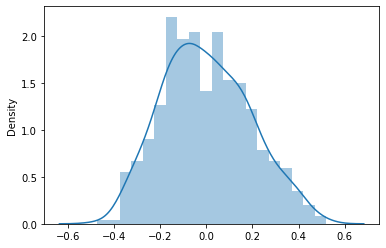

In [101]:
sns.distplot((y_train - y_train_pred), bins =20)

hence ther error are normally distributed with mean 0 

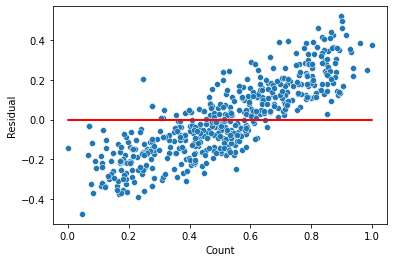

In [102]:
#### Homoscedasticity

y_train_pred = lr_1.predict(x_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Predicition and Evaluation

In [103]:
#apply scaling to continous col
var_num =['temp','windspeed','humidity','count']
df_test[var_num]=scaler.transform(df_test[var_num])

In [104]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,light rain & snow,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
576,2019,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,2019,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,2019,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,2019,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
111,2018,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,light rain & snow,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.243137,0.247059,0.247059,0.029412,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.429398,0.431725,0.431725,0.169124,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
y_test = df_test.pop('count')
x_test = df_test

In [107]:
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   workingday         510 non-null    int64  
 1   windspeed          510 non-null    float64
 2   summer             510 non-null    uint8  
 3   winter             510 non-null    uint8  
 4   light rain & snow  510 non-null    uint8  
 5   mist & cloudy      510 non-null    uint8  
 6   Jul                510 non-null    uint8  
 7   Sep                510 non-null    uint8  
dtypes: float64(1), int64(1), uint8(6)
memory usage: 14.9 KB


In [108]:
x_train_new.columns

Index(['workingday', 'windspeed', 'summer', 'winter', 'light rain & snow',
       'mist & cloudy', 'Jul', 'Sep'],
      dtype='object')

In [109]:
x_test_new_pd = x_test[x_train_new.columns]

In [110]:
x_test_new_pd = sm.add_constant(x_test_new_pd)

In [111]:
y_pred = lr_1.predict(x_test_new_pd)

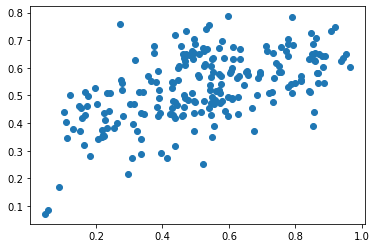

In [112]:
plt.scatter(y_test,y_pred)

## calculate R square value test set

In [113]:
r2=r2_score(y_test, y_pred)
r2

0.31191066578961124

In [114]:
#hence what a model learn on training set very genralize on test set

In [115]:
round(lr_1.params,4)

const                0.5189
workingday           0.0441
windspeed           -0.2622
summer               0.1548
winter               0.0970
light rain & snow   -0.3373
mist & cloudy       -0.1016
Jul                  0.1835
Sep                  0.2194
dtype: float64

#hence we get

count = 0.5189 + 0.0441 x workingday - 0.2622 x windspeed + 0.1548 x summer + 0.0970 x winter - 0.3373 x light rain & snow - 0.1016 x mist & cloudy + 0.1835 x Jul + 0.2194 x Sep

In [116]:


# Calculating Adjusted-R 2 value for the test dataset

adj_r2 = round(1-(1-r2)*(x_test_new_pd.shape[0]-1)/(x_test_new_pd.shape[0]-x_test_new_pd.shape[1]-1),4)
print(adj_r2)

0.2824


## comparision
Train Adj. R-squared:	0.276

Test Adj. R-squared:	0.2824


Train R-squared:	0.287

Test  R-squared:	0.3119

